# Imports

In [1]:
%matplotlib inline

import timeit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix

# Functions to play animations
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

# Circuit functions and gate definitions
import qctools
from gateset import *
from functions import *

# Basic circuit functions (qctools)

## Taking the partial trace of a matrix

In [2]:
q = qctools.CircuitTools(csc_matrix(np.arange(8*8).reshape(32,2)))
q.pTrace([1])

q = qctools.CircuitTools(csc_matrix(np.arange(7*7).reshape(7,7)))
q.pTrace([1])

q = qctools.CircuitTools(csc_matrix(np.arange(8*8).reshape(8,8)))
q.pTrace([5])

q = qctools.CircuitTools(csc_matrix(np.arange(8*8).reshape(8,8)))
q.prettymatrix()
q.pTrace([1,3]).todense()

Error: non-square matrix
Error: matrix size not 2^k
Error: index not in (1, nqubit)


,0,1,2,3,4,5,6,7
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
1,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
2,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
3,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
4,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
5,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0
6,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0
7,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0


matrix([[ 90.+0.j,  98.+0.j],
        [154.+0.j, 162.+0.j]])

## Creating a simple quantum circuit

#### Defining the circuit

In [5]:
qc = qdot(prod(X, S, X),
          prod(H, H, H),
          ctrl(C, X, X),
          ctrl(H, H, C))

q = qctools.CircuitTools(qc)
q.prettymatrix()

,0,1,2,3,4,5,6,7
0,-0.71,(0.35+0j),0j,(0.35+0j),0.00,(0.35+0j),0j,(0.35+0j)
1,0.00,(0.35+0j),0j,(0.35+0j),0.71,(-0.35+0j),0j,(-0.35+0j)
2,0.00,-0.35j,0j,0.35j,0.00,0.35j,0.71j,-0.35j
3,0.00,-0.35j,-0.71j,0.35j,0.00,-0.35j,0j,0.35j
4,0.00,(0.35+0j),0j,(0.35+0j),-0.71,(-0.35+0j),0j,(-0.35+0j)
5,0.71,(0.35+0j),0j,(0.35+0j),0.00,(0.35+0j),0j,(0.35+0j)
6,0.00,-0.35j,0.71j,0.35j,0.00,-0.35j,0j,0.35j
7,0.00,-0.35j,0j,0.35j,0.00,0.35j,-0.71j,-0.35j


#### Defining an initial state and running it through the circuit

In [7]:
init_state = prod(q0, q1, q0)
final_state = q.evolve_state(init_state)

q.prettystate(init_state).transpose()
q.prettystate(final_state).transpose()

q.prettyqubit(final_state)
q.prettyqubit(init_state)

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0


,0,1,2,3,4,5,6,7
0,0j,0j,0j,-0.707j,0j,0j,0.707j,0j


-0.707*I*011 + 0.707*I*110

1.0*010

#### Check if first qubit factorizes (for error correction algorithms)

In [8]:
q.check_recover(init_state)
q.check_recover(final_state)

qubit 1 = logical zero
qubit 1 = not factorizable


# Examples of predefined gates (gateset)

In [11]:
q = qctools.CircuitTools(Chi2)
q.prettymatrix()

q = qctools.CircuitTools(R2(np.pi/4))
q.prettymatrix()

q = qctools.CircuitTools(fSWAP)
q.prettymatrix()

q = qctools.CircuitTools(Fou2(1/4))
q.prettymatrix()

q = qctools.CircuitTools(Bog2(np.pi))
q.prettymatrix()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,-1.0,0.0
3,0.0,0.0,0.0,-1.0


,0,1,2,3
0,1.0,0.0,0j,0j
1,0.0,1.0,0j,0j
2,0.0,0.0,(0.71+0.71j),0j
3,0.0,0.0,0j,(0.71+0.71j)


,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,-1.0


,0,1,2,3
0,1.0,0.00,0j,0j
1,0.0,0.71,0.71j,0j
2,0.0,0.71,-0.71j,0j
3,0.0,0.00,0j,-1j


,0,1,2,3
0,0j,0.0,0.0,-1j
1,0j,1.0,0.0,0j
2,0j,0.0,1.0,0j
3,-1j,0.0,0.0,0j


In [12]:
#q = qctools.CircuitTools(FLIP4)
#q.prettymatrix()

# Hamiltonian determination by gradient descent (circuitgrad)

In [13]:
from circuitgrad import *

In [14]:
Id12 = prod(I, I, I, I, I, I)

Hl = [prod(X, X, I, I, I, I),
      prod(I, I, X, X, I, I),
      prod(I, I, I, I, X, X),
      prod(X, X, X, X, I, I),
      prod(I, I, X, X, X, X)]

Hm = [prod(Z, I, I, I, I, I),
      prod(I, Z, I, I, I, I),
      prod(I, I, Z, I, I, I),
      prod(I, I, I, Z, I, I),
      prod(I, I, I, I, Z, I)]

w, m, beta = 1.0, 0.0, 1.0

Hfull = w*reduce(np.add, Hl) + m*reduce(np.add, Hm)

Utruth = qexp(Hfull, beta)

In [15]:
cinitR = np.random.uniform(-1.0, 1.0, len(Hl)+1)
cinitI = np.random.uniform(-1.0, 1.0, len(Hl)+1)
cinit = cinitR.astype(complex)
for i in range(len(cinitR)):
    cinit[i] = np.add(cinit[i], 1j*cinitI[i])

In [16]:
cspec = cinit
Uguess = specsum(cspec, Id12, Hl)

cspec
Utruth.shape
Uguess.shape

array([-0.35716598+0.55821098j, -0.85298345+0.30028838j,
        0.54587443+0.27929569j, -0.84017929+0.4981703j ,
       -0.29214189+0.60798863j,  0.32754132-0.97476267j])

(64, 64)

(64, 64)

In [17]:
for it in range(100):
    cspec = update_spec(Utruth, cspec, Id12, Hl)
    Uguess = specsum(cspec, Id12, Hl)
    
    lossval = loss_func(Utruth, Uguess)
    
    if it%5 ==0:
        print('epoch / loss:', it, '/', lossval)

epoch / loss: 0 / 18.934365095389925
epoch / loss: 5 / 18.628896760638497
epoch / loss: 10 / 18.32391218227902
epoch / loss: 15 / 18.019435081255246
epoch / loss: 20 / 17.715490694820684
epoch / loss: 25 / 17.412105894175514
epoch / loss: 30 / 17.109309312615448
epoch / loss: 35 / 16.807131485222502
epoch / loss: 40 / 16.5056050012331
epoch / loss: 45 / 16.20476467033066
epoch / loss: 50 / 15.904647704234515
epoch / loss: 55 / 15.605293915089952
epoch / loss: 60 / 15.306745932307766
epoch / loss: 65 / 15.009049439654833
epoch / loss: 70 / 14.712253434558889
epoch / loss: 75 / 14.416410511759706
epoch / loss: 80 / 14.121577173611538
epoch / loss: 85 / 13.82781416951555
epoch / loss: 90 / 13.53518686712854
epoch / loss: 95 / 13.243765658148769


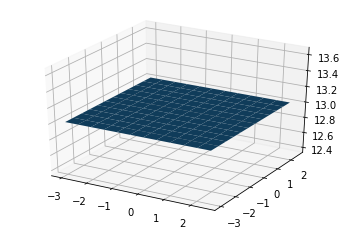

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.5)
tX, tY = np.meshgrid(x, y)
tfunc = np.array([loss_func(Uguess, Utruth) for x,y in zip(np.ravel(tX), np.ravel(tY))])

tZfunc = tfunc.reshape(tX.shape)

ax.plot_surface(tX, tY, tZfunc)
plt.show()